In [1]:
# %pip install fiona

In [3]:
import os
import fiona
import geopandas as gpd

# Set SHAPE_RESTORE_SHX config option
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Path to the shapefile
shapefile_path = '/Users/ulrike_imac_air/projects/maps/Shapefiles/sfBay.shp'

# Load the shapefile
gdf = gpd.read_file(shapefile_path)
print(gdf.head())

                                            geometry
0  POLYGON ((-123.02146 38.81852, -123.02158 38.8...
1  POLYGON ((-122.69068 38.31983, -122.6918 38.32...
2  MULTIPOLYGON (((-122.90154 38.65693, -122.9016...
3  MULTIPOLYGON (((-122.57571 38.29709, -122.5754...
4  POLYGON ((-122.69068 38.31983, -122.68842 38.3...


/Users/ulrike_imac_air/miniforge3/envs/geo_env/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: /Users/ulrike_imac_air/projects/maps/Shapefiles/sfBay.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


### Basic Spatial Analysis

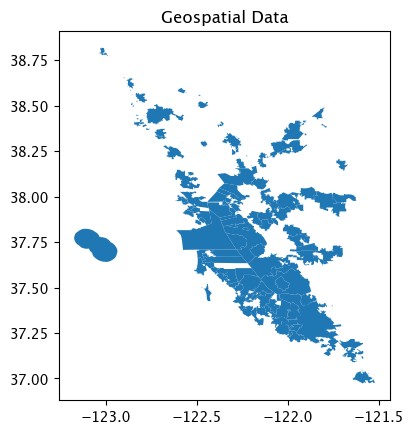

                                            geometry      area
0  POLYGON ((-123.02146 38.81852, -123.02158 38.8...  0.000842
1  POLYGON ((-122.69068 38.31983, -122.6918 38.32...  0.000501
2  MULTIPOLYGON (((-122.90154 38.65693, -122.9016...  0.001184
3  MULTIPOLYGON (((-122.57571 38.29709, -122.5754...  0.003888
4  POLYGON ((-122.69068 38.31983, -122.68842 38.3...  0.001946
                                            geometry  \
0  POLYGON ((-123.02146 38.81852, -123.02158 38.8...   
1  POLYGON ((-122.69068 38.31983, -122.6918 38.32...   
2  MULTIPOLYGON (((-122.90154 38.65693, -122.9016...   
3  MULTIPOLYGON (((-122.57571 38.29709, -122.5754...   
4  POLYGON ((-122.69068 38.31983, -122.68842 38.3...   

                      centroid  
0  POINT (-123.01507 38.79612)  
1  POINT (-122.70919 38.32788)  
2  POINT (-122.86515 38.62253)  
3  POINT (-122.62673 38.24234)  
4  POINT (-122.69645 38.34794)  
                                            geometry  \
0  POLYGON ((-123.02146 38.8185

In [4]:
import matplotlib.pyplot as plt

# Plot the geospatial data
gdf.plot()
plt.title('Geospatial Data')
plt.show()

# Calculate the area of each polygon
gdf['area'] = gdf['geometry'].area
print(gdf[['geometry', 'area']].head())

# Calculate the centroid of each polygon
gdf['centroid'] = gdf['geometry'].centroid
print(gdf[['geometry', 'centroid']].head())

# Buffer each polygon by 0.01 degrees
gdf['buffered'] = gdf['geometry'].buffer(0.01)
print(gdf[['geometry', 'buffered']].head())

In [8]:
%pip install geopandas shapely


Note: you may need to restart the kernel to use updated packages.


In [5]:
import geopandas as gpd
from shapely.geometry import Point

# Define locations of interest in San Francisco
data = {
    "name": [
        "Golden Gate Bridge", "Alcatraz Island", "Fisherman's Wharf", "Union Square", "Chinatown",
        "Baker Beach", "Castro District", "Hidden Garden Steps", "Twin Peaks", "Clarion Alley",
        "Mission Dolores Park", "Nob Hill", "Lombard Street", "Transamerica Pyramid", "Salesforce Tower"
    ],
    "latitude": [
        37.8199, 37.8267, 37.8080, 37.7879, 37.7941,
        37.7936, 37.7609, 37.7563, 37.7544, 37.7616,
        37.7596, 37.7930, 37.8021, 37.7952, 37.7897
    ],
    "longitude": [
        -122.4783, -122.4230, -122.4177, -122.4074, -122.4078,
        -122.4835, -122.4350, -122.4661, -122.4477, -122.4216,
        -122.4270, -122.4160, -122.4187, -122.4022, -122.3960
    ]
}

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")  # WGS 84 projection

# Save as a shapefile
gdf.to_file("san_francisco_locations.shp", driver="ESRI Shapefile")

print("Shapefile created successfully!")


Shapefile created successfully!


#### Spatial Join Example

In [9]:
# Load another shapefile (e.g., points representing locations of interest)
points = gpd.read_file("san_francisco_locations.shp")

# Perform a spatial join to find which points fall within polygons
joined = gpd.sjoin(
    points,
    gdf,
    how="inner",
    predicate="within"
)

# Display the result
print(joined)

               name_left  latitude_left  longitude_left  \
0     Golden Gate Bridge        37.8199       -122.4783   
1        Alcatraz Island        37.8267       -122.4230   
2      Fisherman's Wharf        37.8080       -122.4177   
3           Union Square        37.7879       -122.4074   
4              Chinatown        37.7941       -122.4078   
5            Baker Beach        37.7936       -122.4835   
6        Castro District        37.7609       -122.4350   
7    Hidden Garden Steps        37.7563       -122.4661   
8             Twin Peaks        37.7544       -122.4477   
9          Clarion Alley        37.7616       -122.4216   
10  Mission Dolores Park        37.7596       -122.4270   
11              Nob Hill        37.7930       -122.4160   
12        Lombard Street        37.8021       -122.4187   
13  Transamerica Pyramid        37.7952       -122.4022   
14      Salesforce Tower        37.7897       -122.3960   

                     geometry  index_right            n

In [10]:
import contextily as cx
import matplotlib.pyplot as plt

# Ensure joined data is in Web Mercator
if joined.crs.to_string() != "EPSG:3857":
    joined_wm = joined.to_crs(epsg=3857)
else:
    joined_wm = joined


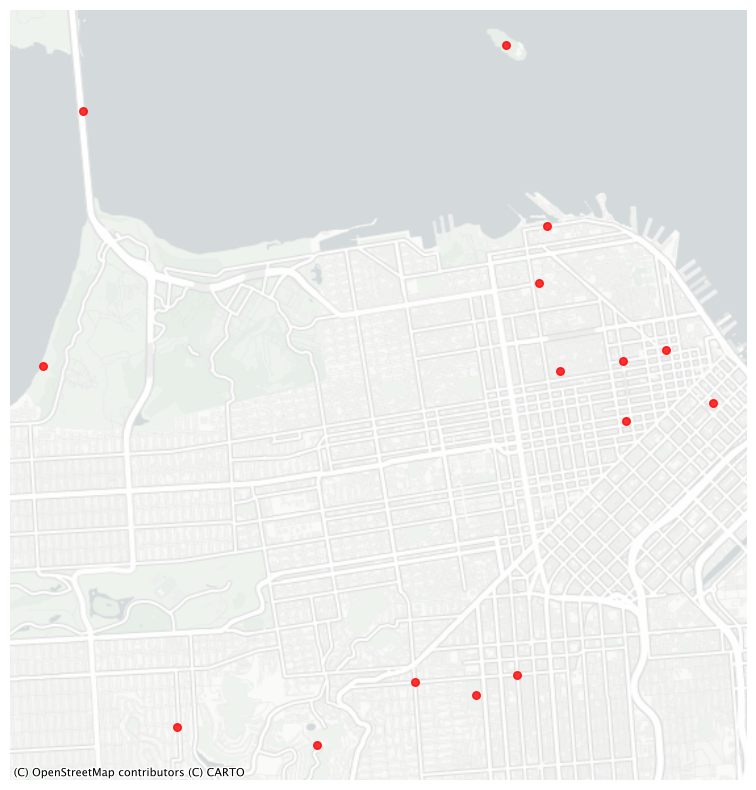

In [11]:
ax = joined_wm.plot(
    figsize=(10, 10),
    color="red",
    markersize=30,
    alpha=0.8
)

cx.add_basemap(
    ax,
    source=cx.providers.CartoDB.PositronNoLabels
)

ax.set_axis_off()
ax.grid(False)

plt.show()


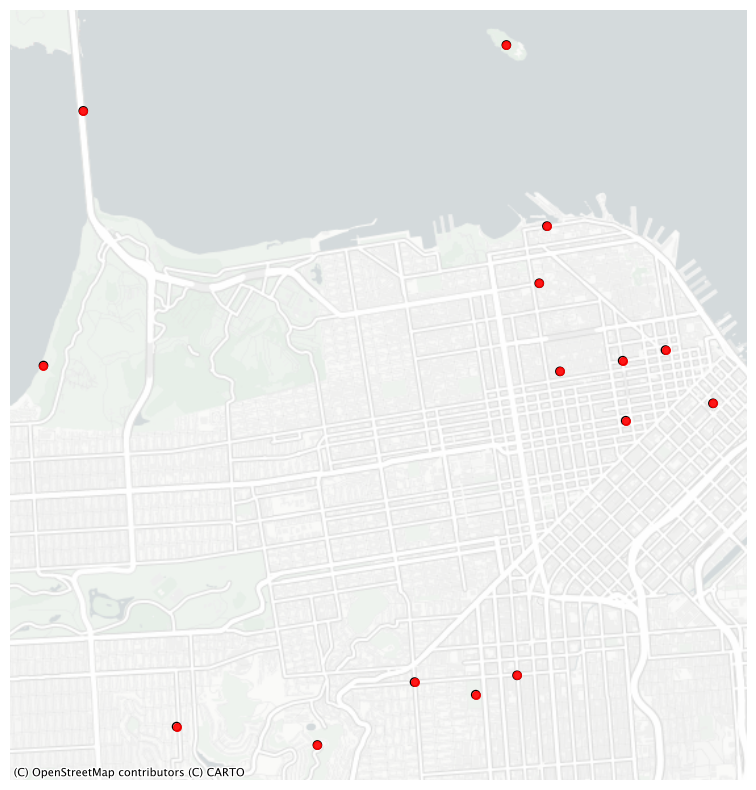

In [12]:
# Reproject polygons if needed
gdf_wm = gdf.to_crs(joined_wm.crs)

ax = gdf_wm.plot(
    figsize=(10, 10),
    facecolor="none",
    edgecolor="black",
    linewidth=1
)

joined_wm.plot(
    ax=ax,
    color="red",
    markersize=30,
    alpha=0.9
)

cx.add_basemap(
    ax,
    source=cx.providers.CartoDB.PositronNoLabels
)

ax.set_axis_off()
ax.grid(False)

plt.show()
